# Dataset

## Abstract
- This section introduce datasets of 3D representation.
    - Pix3D
    - Redwood-3dscan

## Introduction
temp

In [1]:
%load_ext autoreload
%autoreload 2

## Pix3D
temp

In [10]:
!wget http://pix3d.csail.mit.edu/data/pix3d.zip
!unzip pix3d.zip -d $DATA_PATH | pv -l >/dev/null
!rm pix3d.zip

--2021-11-19 15:43:25--  http://pix3d.csail.mit.edu/data/pix3d.zip
Resolving pix3d.csail.mit.edu (pix3d.csail.mit.edu)... 128.52.128.175
Connecting to pix3d.csail.mit.edu (pix3d.csail.mit.edu)|128.52.128.175|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783261880 (3.5G) [application/zip]
Saving to: ‘pix3d.zip’

pix3d.zip           100%[===================>]   3.52G  12.2MB/s    in 5m 2s   

2021-11-19 15:48:27 (12.0 MB/s) - ‘pix3d.zip’ saved [3783261880/3783261880]

22.9k 0:01:04 [ 356 /s] [                                   <=>                ]


In [2]:
from tutlibs.dataset import Pix3D
DATA_PATH = "../data/pix3d"

from tutlibs.visualization import JupyterVisualizer as jv
from tutlibs.constructing import voxel_to_point, point_to_image
from tutlibs.io import Mesh
from tutlibs.transformation import translation
from tutlibs.utils import single_color
from os.path import join as opj
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


temp

In [3]:
dataset = Pix3D(DATA_PATH)

In [7]:
_, _, voxel,_, _ = dataset[0]
obj_voxel = jv.voxel(voxel)
jv.display([obj_voxel])

Output()

In [8]:
img, _, voxel, _, info = dataset[0]
vertices, triangles, _ = Mesh.read(opj("../data/pix3d",info["model"]))

point_cloud = voxel_to_point(voxel)
v_x_min = np.min(point_cloud[:, 0])
v_x_max = np.max(point_cloud[:, 0])
v_x_size = v_x_max - v_x_min
x_min = np.min(vertices[:, 0])
x_max = np.max(vertices[:, 0])
x_size = x_max - x_min
scale = x_size / v_x_size
# scale = 0.0060305777
point_cloud *= scale
point_cloud[:, 2] *= -1

point_cloud = translation(point_cloud, np.array([0, 0, 0]))
obj_point_cloud = jv.point(point_cloud, single_color('#ff0000', len(point_cloud)), [0, 255])
obj_mesh = jv.mesh(vertices, triangles)
jv.display([obj_mesh, obj_point_cloud])

Output()

Output()

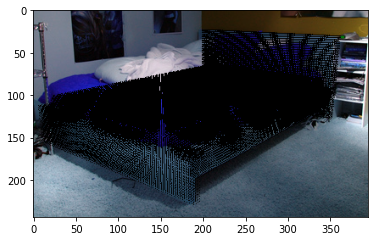

In [6]:
img, _, voxel, obj, info = dataset[0]

point_cloud = voxel_to_point(voxel)
v_x_min = np.min(point_cloud[:, 0])
v_x_max = np.max(point_cloud[:, 0])
v_x_size = v_x_max - v_x_min

vertices, triangles, data = Mesh.read(opj("../data/pix3d",info["model"]))
x_min = np.min(vertices[:, 0])
x_max = np.max(vertices[:, 0])
x_size = x_max - x_min

scale = x_size / v_x_size
# scale = 0.0060305777
point_cloud *= scale
point_cloud[:, 2] *= -1

img_x, img_y = info["img_size"]
focal_length = info["focal_length"]

fx = fy = focal_length / 32 * img_x
cx = img_x / 2
cy = img_y / 2
rot_mat = np.array(info["rot_mat"])
trans_mat = np.array(info["trans_mat"])

p_img, pp_img = point_to_image(point_cloud, img, fx, fy, cx, cy, rot_mat, trans_mat)
plt.imshow(p_img)
obj_points = jv.point(np.concatenate([pp_img, np.full((len(pp_img), 1), 1)], axis=1))
jv.display([obj_points])

## Redwood-3dscan

## References
- [Sun, Xingyuan, Jiajun Wu, Xiuming Zhang, Zhoutong Zhang, Chengkai Zhang, Tianfan Xue, Joshua B. Tenenbaum, and William T. Freeman. 2018. “Pix3D: Dataset and Methods for Single-Image 3D Shape Modeling.” In 2018 IEEE/CVF Conference on Computer Vision and Pattern Recognition. IEEE. https://doi.org/10.1109/cvpr.2018.00314.](https://openaccess.thecvf.com/content_cvpr_2018/html/Sun_Pix3D_Dataset_and_CVPR_2018_paper.html)
- [A Geiger, P Lenz, C Stiller, and R Urtasun. 2013. Vision meets robotics: The KITTI dataset. Int. J. Rob. Res. 32, 11 (September 2013), 1231–1237. DOI:https://doi.org/10.1177/0278364913491297](http://www.cvlibs.net/datasets/kitti/)